### Advanced EDA Questions for Netflix Dataset
**Data Exploration**

1. How many Movies vs TV Shows are there?

2. Which country produces the most Netflix content?

3. How has the number of releases changed year by year?

**Content Analysis**

4. Who are the top 10 most frequent directors on Netflix?

5. Which actors appear most often?

6. What are the most common genres on Netflix?

**Trends & Patterns**

7. Compare the growth of Movies vs TV Shows over time.

8. Which decade produced the most Netflix content?

9. Are certain genres more common in certain countries (e.g., Bollywood → India)?

**Ratings & Duration**

10. What are the most common parental ratings (e.g., PG-13, TV-MA)?

11. What’s the average runtime of movies by genre?

12. Do longer movies get better/worse ratings?

**Text Analysis**

13. Which words are most common in Netflix descriptions? (wordcloud)

14. Are there recurring themes in descriptions (e.g., "love", "crime", "friendship")?

15. Can you identify clusters of shows based on keywords in their descriptions?

**Comparisons**

16. Compare content from USA vs India vs UK (most common genres, average release year).

17. Are Netflix Originals (if flagged) rated better than non-originals?

18. Does Netflix add more international (non-USA) content over time?

**Advanced Challenges**

19.Use pivot tables to analyze the relationship between rating (TV-MA, PG, etc.) and genre.

20. Find the top 10 fastest-growing genres (year-over-year).

In [1]:
import numpy as np
import pandas as pd
df=pd.read_csv("netflix_titles.csv/netflix_titles.csv")

In [2]:
df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


# 1. How many Movies vs TV Shows are there?

In [3]:
df['type'].value_counts()

type
Movie      6131
TV Show    2676
Name: count, dtype: int64

# 2. Which country produces the most Netflix content?

In [4]:
df.country.mode()

0    United States
Name: country, dtype: object


# 3. How has the number of releases changed year by year?

In [5]:
df.groupby('release_year').size().sort_index()

release_year
1925       1
1942       2
1943       3
1944       3
1945       4
        ... 
2017    1032
2018    1147
2019    1030
2020     953
2021     592
Length: 74, dtype: int64

# 4. Who are the top 10 most frequent directors on Netflix?

In [6]:
directors = df['director'].dropna()

In [7]:
directors = directors.str.split(',').explode().str.strip()

In [8]:
directors

0       Kirsten Johnson
2       Julien Leclercq
5         Mike Flanagan
6         Robert Cullen
6        José Luis Ucha
             ...       
8801    Majid Al Ansari
8802      David Fincher
8804    Ruben Fleischer
8805       Peter Hewitt
8806        Mozez Singh
Name: director, Length: 6978, dtype: object

In [9]:
directors.value_counts().head(10)

director
Rajiv Chilaka          22
Jan Suter              21
Raúl Campos            19
Suhas Kadav            16
Marcus Raboy           16
Jay Karas              15
Cathy Garcia-Molina    13
Jay Chapman            12
Youssef Chahine        12
Martin Scorsese        12
Name: count, dtype: int64

In [10]:
# 5. Which actors appear most often?

In [11]:
actors=df['cast'].dropna()
actors = actors.str.split(',').explode().str.strip()

In [12]:
actors.mode()

0    Anupam Kher
Name: cast, dtype: object

In [13]:
# 6. What are the most common genres on Netflix?

In [14]:
genre=df['listed_in'].dropna()
genre = genre.str.split(',').explode().str.strip()

In [15]:
genre

0                  Documentaries
1         International TV Shows
1                      TV Dramas
1                   TV Mysteries
2                 Crime TV Shows
                  ...           
8805    Children & Family Movies
8805                    Comedies
8806                      Dramas
8806        International Movies
8806            Music & Musicals
Name: listed_in, Length: 19323, dtype: object

In [16]:
genre.value_counts().head(10)

listed_in
International Movies        2752
Dramas                      2427
Comedies                    1674
International TV Shows      1351
Documentaries                869
Action & Adventure           859
TV Dramas                    763
Independent Movies           756
Children & Family Movies     641
Romantic Movies              616
Name: count, dtype: int64

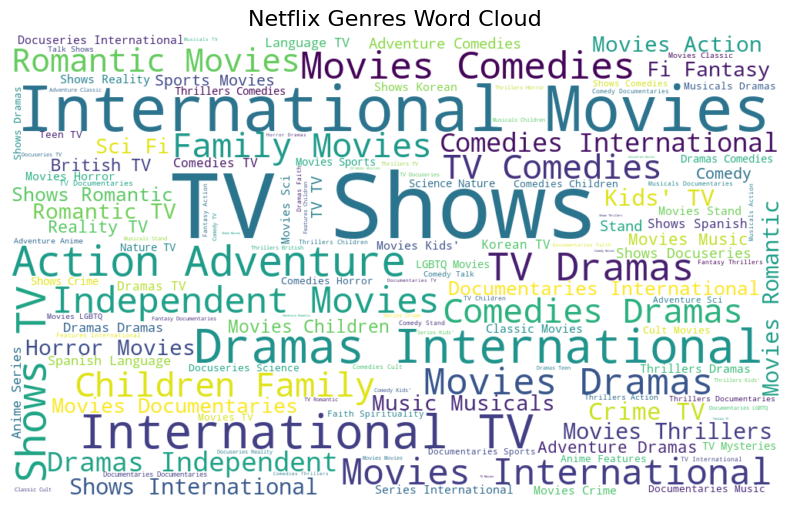

In [17]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

text = " ".join(df['listed_in'].dropna().astype(str))

wc = WordCloud(width=1000, height=600, background_color="white", colormap="viridis").generate(text)

# Plot
plt.figure(figsize=(12,6))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.title("Netflix Genres Word Cloud", fontsize=16)
plt.show()


# 7. Compare the growth of Movies vs TV Shows over time.

In [44]:
growth = df.groupby(['release_year', 'type']).size().unstack(fill_value=0)
growth

type,Movie,TV Show
release_year,,
1925,0,1
1942,2,0
1943,3,0
1944,3,0
1945,3,1
...,...,...
2017,767,265
2018,767,380
2019,633,397


# 8. Which decade produced the most Netflix content?

In [19]:
df['Decade'] = (df['release_year'] // 10) * 10

In [20]:
df['Decade']

0       2020
1       2020
2       2020
3       2020
4       2020
        ... 
8802    2000
8803    2010
8804    2000
8805    2000
8806    2010
Name: Decade, Length: 8807, dtype: int64

In [21]:
df['Decade'] = df['Decade'].astype(str) + "s"

In [22]:
df.Decade.value_counts().idxmax()

'2010s'

# 9. Are certain genres more common in certain countries (e.g., Bollywood → India)?

In [23]:
# Split multiple genres
df_genres = df.assign(Genre=df['listed_in'].str.split(', ')).explode('Genre')

# Split multiple countries
df_genres = df_genres.assign(Country=df_genres['country'].str.split(', ')).explode('Country')

df_genres = df_genres.dropna(subset=['Genre', 'Country'])


In [24]:
genre_country = df_genres.groupby(['Country', 'Genre']).size().reset_index(name='Count')
print(genre_country.head(10))

       Country                   Genre  Count
0                               Dramas      1
1                   Independent Movies      1
2                 International Movies      1
3               International TV Shows      1
4                            TV Dramas      1
5  Afghanistan           Documentaries      1
6  Afghanistan    International Movies      1
7      Albania                  Dramas      1
8      Albania    International Movies      1
9      Algeria          Classic Movies      1


In [25]:
top_genre_country = genre_country.loc[genre_country.groupby('Country')['Count'].idxmax()]
print(top_genre_country.head(10))

        Country                   Genre  Count
0                                Dramas      1
5   Afghanistan           Documentaries      1
7       Albania                  Dramas      1
10      Algeria                  Dramas      3
13       Angola      Action & Adventure      1
27    Argentina    International Movies     58
45      Armenia           Documentaries      1
57    Australia                  Dramas     38
88      Austria    International Movies      9
94   Azerbaijan  International TV Shows      1


# 10. What are the most common parental ratings (e.g., PG-13, TV-MA)?

In [26]:
df['rating'].value_counts()

rating
TV-MA       3207
TV-14       2160
TV-PG        863
R            799
PG-13        490
TV-Y7        334
TV-Y         307
PG           287
TV-G         220
NR            80
G             41
TV-Y7-FV       6
NC-17          3
UR             3
74 min         1
84 min         1
66 min         1
Name: count, dtype: int64

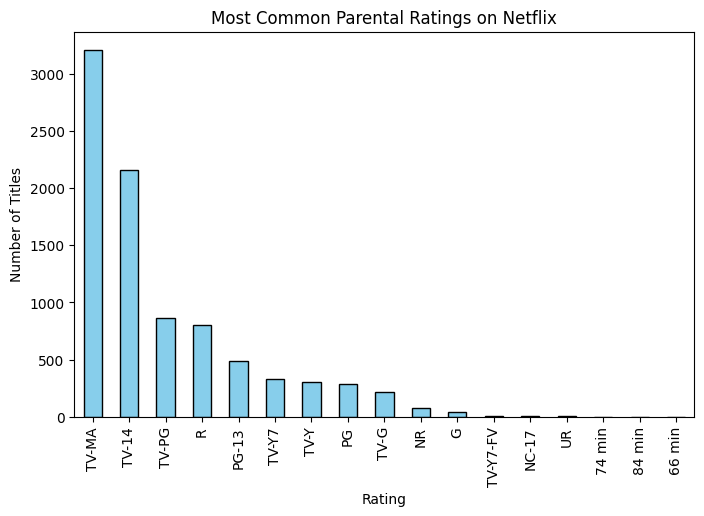

In [27]:
plt.figure(figsize=(8,5))
df['rating'].value_counts().plot(kind='bar', color='skyblue', edgecolor='black')
plt.title("Most Common Parental Ratings on Netflix")
plt.xlabel("Rating")
plt.ylabel("Number of Titles")
plt.show()


# 11. What’s the average runtime of movies by genre?

In [28]:
movies = df[df['type'] == 'Movie'].copy()

In [29]:
movies

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,Decade
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2020s
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",NaN,"September 24, 2021",2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...,2020s
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s...",1990s
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...,2020s
12,s13,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic","September 23, 2021",2021,TV-MA,127 min,"Dramas, International Movies",After most of her family is murdered in a terr...,2020s
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8801,s8802,Movie,Zinzana,Majid Al Ansari,"Ali Suliman, Saleh Bakri, Yasa, Ali Al-Jabri, ...","United Arab Emirates, Jordan","March 9, 2016",2015,TV-MA,96 min,"Dramas, International Movies, Thrillers",Recovering alcoholic Talal wakes up inside a s...,2010s
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a...",2000s
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...,2000s
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero...",2000s


In [30]:
movies['Runtime'] = movies['duration'].str.replace(" min", "").astype(float)

In [31]:
movies

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,Decade,Runtime
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2020s,90.0
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",NaN,"September 24, 2021",2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...,2020s,91.0
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s...",1990s,125.0
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...,2020s,104.0
12,s13,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic","September 23, 2021",2021,TV-MA,127 min,"Dramas, International Movies",After most of her family is murdered in a terr...,2020s,127.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8801,s8802,Movie,Zinzana,Majid Al Ansari,"Ali Suliman, Saleh Bakri, Yasa, Ali Al-Jabri, ...","United Arab Emirates, Jordan","March 9, 2016",2015,TV-MA,96 min,"Dramas, International Movies, Thrillers",Recovering alcoholic Talal wakes up inside a s...,2010s,96.0
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a...",2000s,158.0
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...,2000s,88.0
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero...",2000s,88.0


In [32]:
movies['listed_in'] = movies['listed_in'].str.split(", ").explode('listed_in')
movies.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,Decade,Runtime
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2020s,90.0
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",NaN,"September 24, 2021",2021,PG,91 min,Dramas,Equestria's divided. But a bright-eyed hero be...,2020s,91.0
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,Dramas,"On a photo shoot in Ghana, an American model s...",1990s,125.0
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min,Children & Family Movies,A woman adjusting to life after a loss contend...,2020s,104.0
12,s13,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic","September 23, 2021",2021,TV-MA,127 min,International Movies,After most of her family is murdered in a terr...,2020s,127.0


In [33]:
movies.groupby('listed_in').Runtime.mean()

listed_in
Action & Adventure          101.594805
Anime Features              104.361702
Children & Family Movies     99.936396
Classic Movies               97.090909
Comedies                    101.820611
Cult Movies                 107.941176
Documentaries                98.521490
Dramas                       99.154930
Faith & Spirituality        107.764706
Horror Movies                96.181208
Independent Movies          101.003311
International Movies         98.034661
LGBTQ Movies                105.333333
Movies                       97.766667
Music & Musicals             99.735751
Romantic Movies              98.784053
Sci-Fi & Fantasy             99.169811
Sports Movies               101.619565
Stand-Up Comedy              96.886275
Thrillers                   101.438462
Name: Runtime, dtype: float64


# 12. Do longer movies get better/worse ratings?


rating
NC-17       125.000000
TV-14       110.290820
PG-13       108.330612
R           106.720201
UR          106.333333
PG           98.282230
TV-MA        95.889913
TV-PG        94.851852
NR           94.533333
G            90.268293
TV-G         79.666667
TV-Y7-FV     68.400000
TV-Y7        66.287770
TV-Y         48.114504
66 min             NaN
74 min             NaN
84 min             NaN
Name: Runtime, dtype: float64


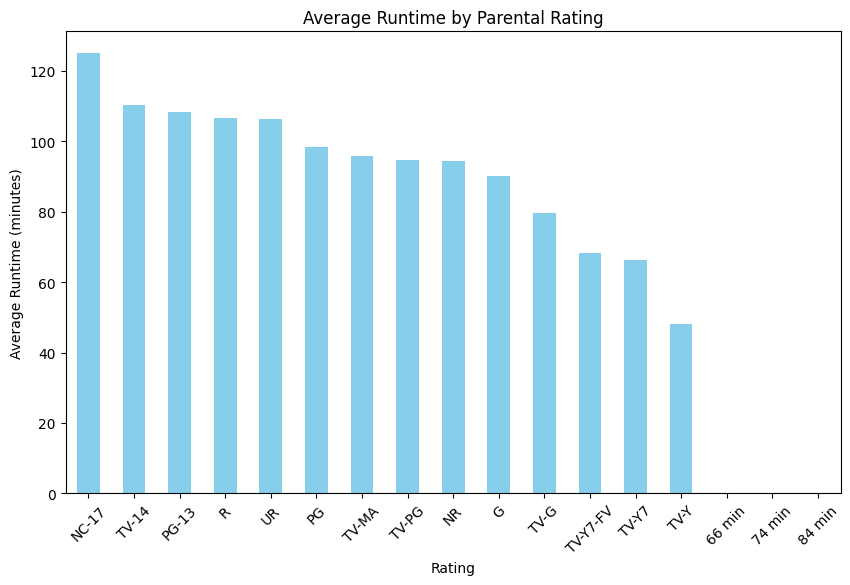

In [34]:
movies = df[df['type'] == 'Movie'].copy()

# Convert duration to numeric
movies['Runtime'] = movies['duration'].str.replace(" min", "").astype(float)

# Average runtime by parental rating
runtime_by_rating = movies.groupby('rating')['Runtime'].mean().sort_values(ascending=False)
print(runtime_by_rating)

plt.figure(figsize=(10,6))
runtime_by_rating.plot(kind='bar', color='skyblue')
plt.title("Average Runtime by Parental Rating")
plt.xlabel("Rating")
plt.ylabel("Average Runtime (minutes)")
plt.xticks(rotation=45)
plt.show()


In [35]:
bins = [0, 90, 120, 300]
labels = ['Short (<90)', 'Medium (90-120)', 'Long (>120)']
movies['RuntimeGroup'] = pd.cut(movies['Runtime'], bins=bins, labels=labels, right=False)

runtime_vs_rating = pd.crosstab(movies['RuntimeGroup'], movies['rating'])
print(runtime_vs_rating)


rating            G  NC-17  NR   PG  PG-13    R  TV-14  TV-G  TV-MA  TV-PG  \
RuntimeGroup                                                                 
Short (<90)      26      1  34   68     56  100    290    81    727    205   
Medium (90-120)  11      1  33  201    321  542    644    36   1054    220   
Long (>120)       4      1   8   18    113  155    493     9    280    115   

rating           TV-Y  TV-Y7  TV-Y7-FV  UR  
RuntimeGroup                                
Short (<90)       126    119         4   0  
Medium (90-120)     5     19         1   3  
Long (>120)         0      1         0   0  


# 13. Which words are most common in Netflix descriptions? (wordcloud)

In [36]:
text= " ".join(df.description.dropna().astype(str))

In [37]:
image= WordCloud(width=1200, height=800, background_color='yellow', colormap="viridis").generate(text)

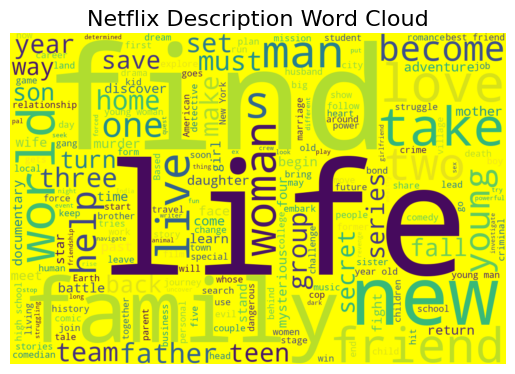

In [38]:
plt.imshow(image, interpolation='bilinear')
plt.axis("off")
plt.title("Netflix Description Word Cloud", fontsize=16)
plt.show()

# 14. Are there recurring themes in descriptions (e.g., "love", "crime", "friendship")?